In [7]:
# Imports
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

# Map to priority levels (optional interpretation)
df['priority'] = df['target'].map({0: 'High', 1: 'Low'})  # simulating issue priority

# Split data
X = df.drop(['target', 'priority'], axis=1)
y = df['priority']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label="High")

print("Accuracy:", acc)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.9707602339181286
F1 Score: 0.959349593495935

Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.94      0.96        63
         Low       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



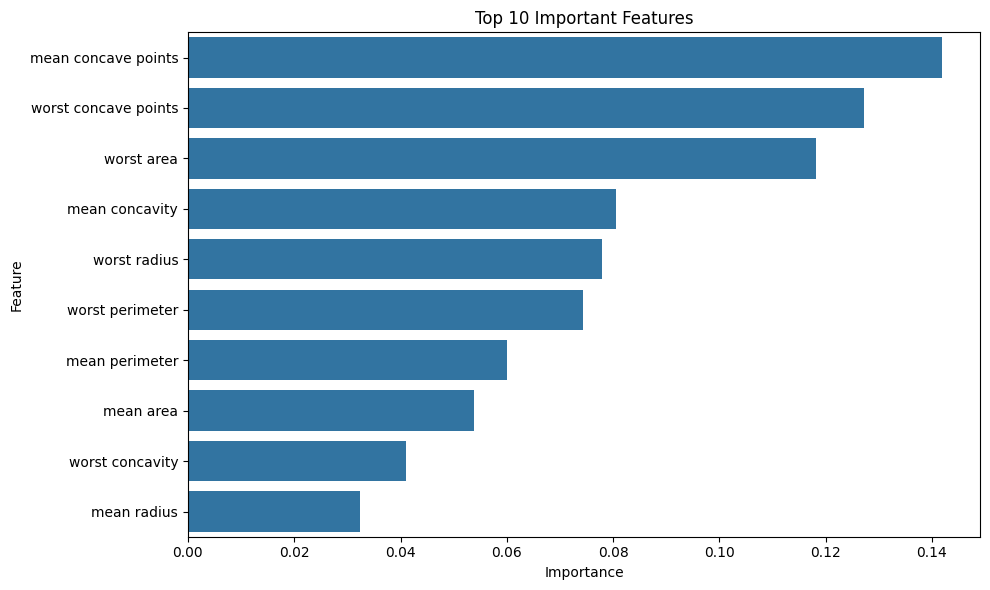

In [8]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()
